In [1]:
!pip install mplcursors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import mplcursors

In [2]:
cost_living_file = "csvData.csv"
bls_file = "Data_Science_BLS_OES_Report.csv"

cost_living_df = pd.read_csv(cost_living_file)
bls_df = pd.read_csv(bls_file)
print(bls_df)

                        Area Name Employment(1)  \
0                Alabama(0100000)           210   
1                 Alaska(0200000)           170   
2                Arizona(0400000)          1400   
3               Arkansas(0500000)           260   
4             California(0600000)          9510   
5               Colorado(0800000)          1260   
6            Connecticut(0900000)           860   
7   District of Columbia(1100000)           590   
8                Florida(1200000)          2430   
9                Georgia(1300000)          2310   
10                Hawaii(1500000)            50   
11                 Idaho(1600000)            80   
12              Illinois(1700000)          3290   
13               Indiana(1800000)          1070   
14                  Iowa(1900000)           720   
15                Kansas(2000000)           320   
16              Kentucky(2100000)           600   
17             Louisiana(2200000)           140   
18                 Maine(230000

In [3]:
bls_df.columns

Index(['Area Name', 'Employment(1)',
       'Employment percent relative standard error(3)', 'Hourly mean wage',
       'Annual mean wage(2)', 'Wage percent relative standard error(3)',
       'Hourly 10th percentile wage', 'Hourly 25th percentile wage',
       'Hourly median wage', 'Hourly 75th percentile wage',
       'Hourly 90th percentile wage', 'Annual 10th percentile wage(2)',
       'Annual 25th percentile wage(2)', 'Annual median wage(2)',
       'Annual 75th percentile wage(2)', 'Annual 90th percentile wage(2)',
       'Employment per 1,000 jobs', 'Location Quotient'],
      dtype='object')

In [4]:
bls_df["State"] = bls_df['Area Name'].apply(lambda x: x.split("(")[0])
bls_state_employment_df = bls_df.loc[:, ['State', 'Employment(1)']]
bls_df

,Area Name,Employment(1),Employment percent relative standard error(3),Hourly mean wage,Annual mean wage(2),Wage percent relative standard error(3),Hourly 10th percentile wage,Hourly 25th percentile wage,Hourly median wage,Hourly 75th percentile wage,Hourly 90th percentile wage,Annual 10th percentile wage(2),Annual 25th percentile wage(2),Annual median wage(2),Annual 75th percentile wage(2),Annual 90th percentile wage(2),"Employment per 1,000 jobs",Location Quotient,State
0,Alabama(0100000),210,19.7,43.10,89650,3.2,27.17,35.80,43.55,50.79,58.59,56510,74460,90590,105650,121870,0.113,0.26,Alabama
1,Alaska(0200000),170,14.5,36.69,76310,2.7,25.83,29.70,35.63,43.74,49.57,53720,61780,74110,90980,103100,0.561,1.31,Alaska
2,Arizona(0400000),1400,23.1,52.21,108590,2.1,29.47,42.03,53.80,62.61,73.82,61290,87430,111900,130240,153540,0.494,1.15,Arizona
3,Arkansas(0500000),260,7.0,54.58,113530,2.7,38.61,45.31,52.41,64.56,77.40,80310,94250,109020,134290,160980,0.217,0.50,Arkansas
4,California(0600000),9510,5.7,62.05,129060,3.7,33.34,42.28,61.21,78.19,95.14,69340,87940,127310,162630,197890,0.579,1.35,California
5,Colorado(0800000),1260,5.4,47.05,97860,2.7,25.85,33.37,44.38,58.17,73.05,53780,69400,92320,121000,151940,0.489,1.14,Colorado
6,Connecticut(0900000),860,16.0,45.91,95480,4.8,22.09,33.63,46.31,57.41,68.17,45950,69940,96320,119420,141800,0.556,1.30,Connecticut
7,District of Columbia(1100000),590,10.0,51.06,106210,3.5,32.30,38.39,47.71,63.36,76.71,67190,79860,99240,131780,159550,0.858,2.00,District of Columbia
8,Florida(1200000),2430,16.6,44.68,92930,2.4,24.81,28.71,41.12,56.95,69.42,51600,59720,85540,118450,144390,0.288,0.67,Florida
9,Georgia(1300000),2310,6.1,41.86,87060,3.9,18.80,26.93,41.15,54.41,67.30,39100,56010,85600,113170,139990,0.536,1.25,Georgia


In [5]:
bls_topstate_employement_df = bls_state_employment_df.sort_values("State", ascending = True)
bls_topstate_employement_df
#States missing:  Delaware, North Dakota, Vermont, Wyoming

,State,Employment(1)
0,Alabama,210
1,Alaska,170
2,Arizona,1400
3,Arkansas,260
4,California,9510
5,Colorado,1260
6,Connecticut,860
7,District of Columbia,590
8,Florida,2430
9,Georgia,2310


In [6]:
bls_state_salary_df = bls_df.loc[:, ['State', 'Annual mean wage(2)']]
bls_state_topsalary_df = bls_state_salary_df.sort_values("Annual mean wage(2)", ascending = False)
bls_state_topsalary_df

,State,Annual mean wage(2)
4,California,129060
31,New York,124240
44,Washington,118320
32,North Carolina,117370
29,New Jersey,116250
20,Massachusetts,114660
27,Nevada,113860
3,Arkansas,113530
19,Maryland,108960
2,Arizona,108590


In [7]:
cost_vs_salary_df = pd.merge(bls_state_topsalary_df, cost_living_df, on = "State")
cost_vs_salary_df

,State,Annual mean wage(2),costIndex,groceryCost,housingCost,utilitiesCost,transportationCost,miscCost
0,California,129060,151.7,121.4,227.3,117.7,138.9,114.5
1,New York,124240,139.1,114.8,204.4,108.7,116.6,104.8
2,Washington,118320,110.7,107.8,117.8,88.7,121.7,118.9
3,North Carolina,117370,94.9,96.6,83.1,97.9,93.4,110.6
4,New Jersey,116250,125.1,109.5,163.1,101.6,111.1,101.7
5,Massachusetts,114660,131.6,113.9,170.3,109.7,116.0,117.6
6,Nevada,113860,108.5,108.3,121.8,89.0,123.5,105.7
7,Arkansas,113530,86.9,92.0,73.9,91.8,83.6,85.6
8,Maryland,108960,129.7,108.5,184.5,107.3,116.7,89.2
9,Arizona,108590,97.0,96.9,91.7,107.4,109.6,94.7


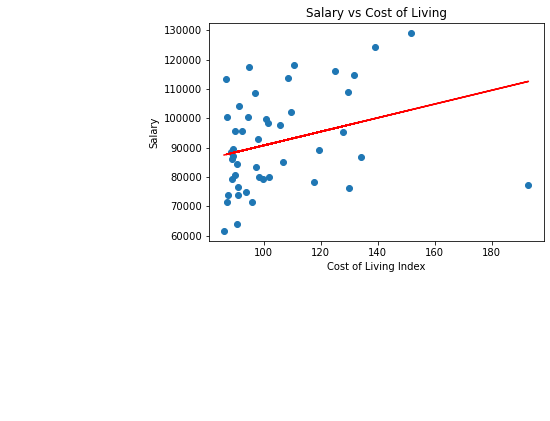

In [10]:
x_values = cost_vs_salary_df["costIndex"]
y_values = cost_vs_salary_df["Annual mean wage(2)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.xlabel('Cost of Living Index')
plt.ylabel('Salary')
plt.title('Salary vs Cost of Living')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),color="red")
mplcursors.cursor(hover=True)

plt.show()